El script de la Unidad_No.1_Regresion Linear simple_aplicada, cubrió desde los componentes de la Regresión Lineal, al método de MCO y los supuestos del modelo.
En el script de hoy, trabajaremos con la base de los bienes inmuebles y mejoraremos la variabilidad explicada introduciendo nuevas variables al modelo, sin discriminar si son de tipo numérica o categórica.

Manos a la obra!

# La Regresión Lineal Múltiple

A diferencia de lo que hemos aprendido hasta el día de hoy, la regresión lineal múltiple se utiliza para estimar la relación entre *dos o más variables independientes* y una variable dependiente. 


$$\hat Y=\underbrace{\hat \beta_0+\hat \beta_1X+\hat \beta_2X+...\hat \beta_nX}_{modelo}+\underbrace{\epsilon}_{error} $$

Al igual que la Regresión Lineal simple, su versión extendida recoge en el lado izquierdo de la estimación de nuestra variable dependiente "Y" por el método de Mínimos Cuadrados Ordinarios-MCO y los términos de la mano derecha representan a nuestra línea recta más un error de estimación que es la diferencia entre el valor observado o real de "Y" y el valor estimado de "Y" por la fórmula precedente.

Específicamente, se utiliza para evaluar la relación entre dos variables teniendo en cuenta el efecto de otras variables, lo que permite cancelar el efecto de estas otras variables para aislar y medir la relación entre las dos variables de interés. Este punto es la principal diferencia con la regresión lineal simple.

Recordemos que el error, recogía la influencia de variables explicativas no incluídas en el modelo y seguía una distribución conjunta normal, con media cero y de desviación estándar desconocida. 

Es así que típicamente en este script esperaríamos que los errores generados en nuestros modelos de regresión contengan errores menores a los de la regresión simple.

    

_Nota No. 1: Es importante mencionar la estimación de los parámetros por el método de los mínimos cuadrados se basa en el mismo principio que el de la regresión lineal simple, pero aplicado a "p" dimensiones. Por lo tanto, ya no se trata de encontrar la mejor línea (la que pasa más cerca de los pares de puntos) sino de encontrar el plano p-dimensional que pasa más cerca de los puntos. Para ello, se aplica el método MCO y se minimiza la suma de los cuadrados de las desviaciones de los puntos en el plano:_

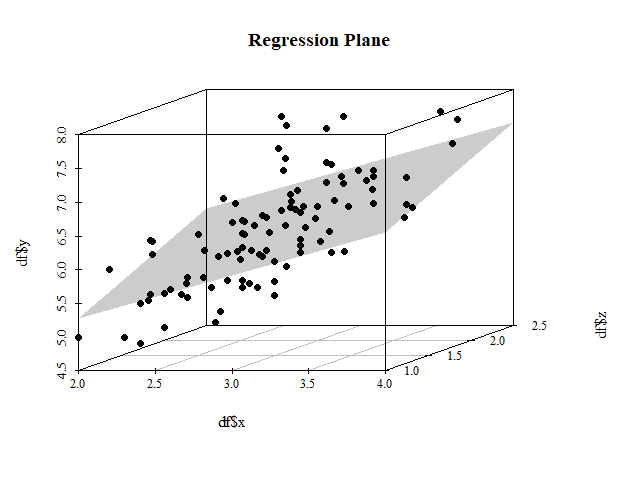

_Fuente: Stackoverflow:scatterplot3d regression plane with residuals_

Para la interpretación de los coeficientes de nuestros estimadores, tenemos que terner en cuenta que se trata de una estimación ajustada de los coeficientes, lo que significa que es: "después de tener en cuenta los efectos lineales de las otras variables independientes sobre la variable dependiente, pero también sobre la variable predictora", lo que se traduce a que β1 corresponde a la pendiente de la relación entre "Y" y "X1"  cuando los efectos lineales de las otras variables explicativas (X2, … , Xn), han sido eliminados, tanto a nivel de la variable dependiente "Y"  como también a nivel de X1 .

### Prueba de hipótesis de los coeficientes de la Regresión Lineal Múltiple


La regresión simple como la múltiple trabaja bajo el supuesto que los coeficientes son significativos. Para determinar si lo son, la regresión tanto simple como múltiple trabaja con un contraste de hipótesis donde se evalúa si  el modelo es o no explicativo. Para ello buscamos que la pendiente de los estimadores sea diferente de cero, dado que si fuera nula, no existiría una línea de regresión y por lo tanto no habría la relación entre la variable independiente y la dependiente.


Para ello, utilizando las pruebas _t_ y sus niveles críticos se busca contrastar que:
- H0 : β1 = β2 = . . . = βn = 0
- H1 : β1 = β2 = . . . = βn ≠ 0



La prueba de los betas es equivalente a contrastar la hipótesis: ¿es la variable dependiente asociada a la variable independiente estudiada, en igualdad de condiciones (ceteris paribus)?

Observando los valores críticos de la prueba _t_, se puede determinar si los betas son estadísticamente significativos y por lo tanto si contribuyen significativamente a explicar lo que ocurre en la variable dependiente "Y", por lo que tenemos evidencia para incluirlas o descartarlas del modelo analizado.

Finalmente, en este script también cubriremos la temática de ajuste del modelo en el que analizaremos los valores de R^2 y R^2 ajustado, el cual controla por el número de variables independientes introducidas en el modelo.

Comencemos!

Para iniciar, por favor corran o copien todos los tratamientos realizados a las variables de la base de datos de inmuebles conteida en el script anterior.

### Importar los modules requeridos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Para la regresión y validación de supuestos llamamos a statsmodel, el módulo encargado de la notación de fórmula y al módulo para las pruebas de hipótesis.

In [2]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

Ahora, llamemos a nuestra base de datos a nuestro espacio en el Jupyer Notebook:

In [3]:
df=pd.read_csv("house_dataset.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#### Recodificar el nombre de las columnas a español

In [4]:
df.rename({'price':'precio', 'bedrooms': 'cuartos', 'bathrooms':'banios', 'stories': 'pisos', 'mainroad':'carretera',
          'guestroom':'cuarto_huespedes', 'basement': 'sotano', 'hotwaterheating':'calefaccion', 'airconditioning':'AC', 
           'parking':'parqueadero', 'prefarea':'periferia', 'furnishingstatus':'amoblado' }, axis=1, inplace=True)

### Análisis de valores extremos


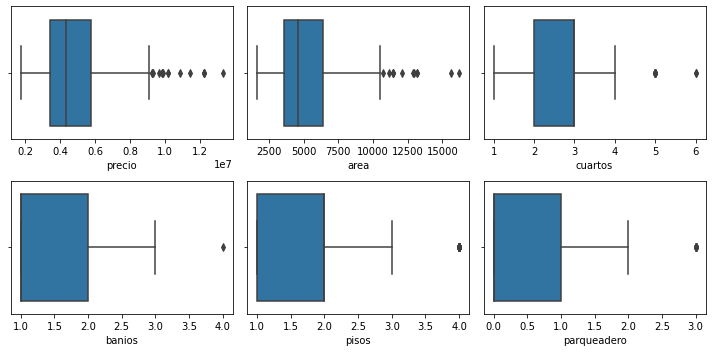

In [5]:
# Box plots
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['precio'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['cuartos'], ax = axs[0,2])
plt1 = sns.boxplot(df['banios'], ax = axs[1,0])
plt2 = sns.boxplot(df['pisos'], ax = axs[1,1])
plt3 = sns.boxplot(df['parqueadero'], ax = axs[1,2])

plt.tight_layout()

De la gráfica de boxplot, podemos ver que las variables donde se requiere el tratamiento de valores extremos es en el precio, y en el área. 

Para el número de baños, el número de cuartos, el número de pisos y el número de parqueaderos no se tiene suficientes datos extremos y su distancia de la media no es tan extrema como en el de las dos variables anteriores.

In [6]:
df.describe()

,precio,area,cuartos,banios,pisos,parqueadero
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#### 1. Variable dependiente "Y"


In [7]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.precio.quantile(0.25)
Q3 = df.precio.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

2310000.0


In [8]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['precio'] < (Q1 - 1.5 * IQR)) |(df['precio'] > (Q3 + 1.5 * IQR)))]
df.shape

(530, 13)

<AxesSubplot:xlabel='precio', ylabel='Density'>

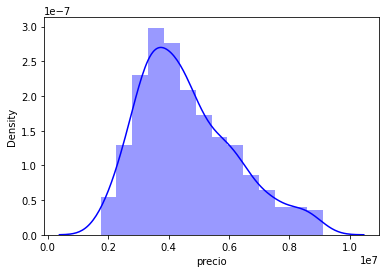

In [9]:
sns.distplot(df['precio'],color="blue")

#### 2. Variable dependiente X1: área


In [10]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1_area = df.area.quantile(0.25)
Q3_area = df.area.quantile(0.75)
IQR_area = Q3_area - Q1_area  #rango intercuartil
print(IQR_area)

2768.25


In [11]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['area'] < (Q1_area - 1.5 * IQR_area)) |(df['area'] > (Q3_area + 1.5 * IQR_area)))]
df.shape

(517, 13)

<AxesSubplot:xlabel='area', ylabel='Density'>

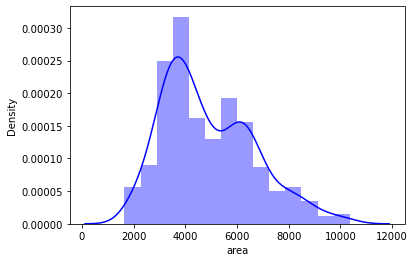

In [12]:
sns.distplot(df['area'],color="blue")

Listo, recordemos las correlaciones de las variables dado que vamos a introducir nuevas variables independiente:

#### Correlaciones entre las variables

In [13]:
df.corr().style.background_gradient(cmap='coolwarm')

,precio,area,cuartos,banios,pisos,parqueadero
precio,1.000000,0.533186,0.335328,0.466483,0.446839,0.321058
area,0.533186,1.000000,0.127745,0.171528,0.109877,0.357276
cuartos,0.335328,0.127745,1.000000,0.346230,0.406684,0.105561
banios,0.466483,0.171528,0.346230,1.000000,0.311314,0.127102
pisos,0.446839,0.109877,0.406684,0.311314,1.000000,0.022043
parqueadero,0.321058,0.357276,0.105561,0.127102,0.022043,1.000000


Ahora comparemos esta información con la gráfica de las variables cuantitativas:

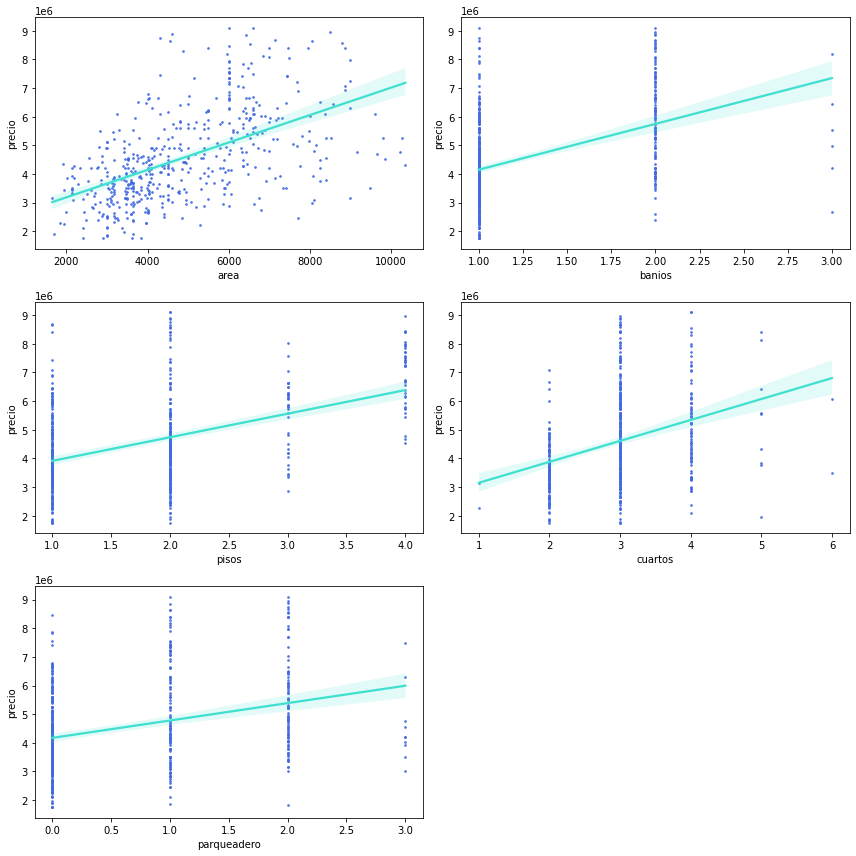

In [14]:
# Número de las variables
n = 6
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = df.corr()
#
cols = corr.nlargest(6, "precio")["precio"].index
# Calculate correlation
for i in np.arange(1,6):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['precio'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

No nos olvidemos de aplicar logaritmos a nuestra variable dependiente:

In [15]:
log_precio=np.log(df.precio)
df['log_precio']=log_precio

Perfecto, como vamos a manera de ejercicio, incluir todas las variables para evaluar si son significativas o no, lo que vamos a realizar a continuación es recodificar las variables cualitativas de forma numérica para que el modelo de regresión pueda cuantificar su incidencia en la variable dependiente de mejor manera.
Para ello, vamos a seguir un proceso para dumificar las variables categóricas con la ayuda del module de pandas. 

In [16]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

Una vez que hemos separado a las variables cualitativas podemos operar de tres maneras:
- La primera implica codificar como 0 y 1s a las variables que tengan dos niveles
- La segunda se puede llevar a cabo aplicando la función de pandas pd.get_dummies() que crea una columna por cada nivel
- La tercera es usando OneHotEncoder

Para evitar crear más columnas de las necesarias, vamos a dumificar sólo aquellas que tengan más de dos niveles.

In [17]:
df[var_cualitativas]

,carretera,cuarto_huespedes,sotano,calefaccion,AC,periferia,amoblado
15,yes,no,yes,no,no,no,semi-furnished
16,yes,yes,yes,no,yes,yes,unfurnished
17,yes,no,no,no,yes,no,furnished
18,yes,yes,no,no,yes,no,furnished
19,yes,no,no,no,yes,yes,semi-furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [18]:
df.loc[:,var_cualitativas]=df[var_cualitativas].replace(to_replace = ['yes','no'],value = ['1','0'])

In [19]:
df

,precio,area,cuartos,banios,pisos,carretera,cuarto_huespedes,sotano,calefaccion,AC,parqueadero,periferia,amoblado,log_precio
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,16.023785
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,16.023785
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,16.008281
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,16.000438
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,15.996493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,14.414347
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,14.384879
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,14.375126
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,14.375126


Perfecto, ahora nos queda dumificar la variable amoblado utilizando labelEncoder:

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [22]:
df.amoblado = labelencoder.fit_transform(df.amoblado)
df

,precio,area,cuartos,banios,pisos,carretera,cuarto_huespedes,sotano,calefaccion,AC,parqueadero,periferia,amoblado,log_precio
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,16.023785
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,2,16.023785
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,16.008281
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,16.000438
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,15.996493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2,14.414347
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,14.384879
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2,14.375126
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,14.375126


Y listo!, pueden utilizar cualquiera de los tres métodos para lograr el objetivo.

Una vez que tenemos nuestra base de datos en el estado deseado para la modelación, procedemos por fines explicativos a incluir todas las variables. En la práctica se debería incluir aquellas que tengan mayor asociación lineal.

In [23]:
regresion = ols("log_precio ~ area + cuartos + banios + pisos + carretera + cuarto_huespedes + sotano + calefaccion +\
                AC + parqueadero + periferia + amoblado", data=df)
results = regresion.fit()

In [24]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     80.06
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          1.92e-108
Time:                        07:33:21   Log-Likelihood:                 90.366
No. Observations:                 517   AIC:                            -154.7
Df Residuals:                     504   BIC:                            -99.51
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                14.39

A priori que diferencia, verdad?

Lo primero que debemos hacer antes de celebrar por el R^2, es analizar el R^2 ajustado, dado que este penaliza la variabilidad explicada por el número de variables.
En esta línea sabemos que este modelo alcanza a explicar en un 65% la variabilidad de nuestra variable dependiente por medio de la inclusión de 12 variables!

El siguiente paso es analizar cúales de las variables son estadísticamente significativas mediante el contraste de hipótesis

- H0 : β1 = β2 = . . . = βn = 0
- H1 : β1 = β2 = . . . = βn ≠ 0



Como todas las variables icluídas pasan la prueba al 95% de confianza el siguiente paso es la validación de los supuestos de Regresión Lineal. En este caso ya no sólo verificaremos los tres cubiertos en el script anterior, sino también multicolinearidad mediante el VIF.

## Verificación de los supuestos de la Regresión Lineal

Dado que contamos con una sola variable explicativa en este modelo de Regresión Lineal, los supuestos a verificar se centrarán en:

- Multicolinearidad perfecta y multicolinearidad no perfecta

- Linealidad en los parámetros
    
- Normalidad en los residuos
    
- Homocedasticidad en los residuos

### 1. Multicolinearidad

Para el primer supuesto y dado que contamos con 12 variables, vamos a importar de la librería statsmodel el VIF:

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
df2=df[df.columns.difference(['precio', 'log_precio'])]
df2

,AC,amoblado,area,banios,calefaccion,carretera,cuarto_huespedes,cuartos,parqueadero,periferia,pisos,sotano
15,0,1,6000,1,0,1,0,4,2,0,2,1
16,1,2,6600,2,0,1,1,4,1,1,2,1
17,1,0,8500,2,0,1,0,3,2,0,4,0
18,1,0,4600,2,0,1,1,3,2,0,2,0
19,1,1,6420,2,0,1,0,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0,2,3000,1,0,1,0,2,2,0,1,1
541,0,1,2400,1,0,0,0,3,0,0,1,0
542,0,2,3620,1,0,1,0,2,0,0,1,0
543,0,0,2910,1,0,0,0,3,0,0,1,0


In [27]:
df2.dtypes

AC                  object
amoblado             int32
area                 int64
banios               int64
calefaccion         object
carretera           object
cuarto_huespedes    object
cuartos              int64
parqueadero          int64
periferia           object
pisos                int64
sotano              object
dtype: object

Como podemos ver, hay algunos tipos de datos que siguen como variables categóricas por lo que vamos a tener que coercionarlos a numéricos, caso contrario el VIF no funcionará:

In [28]:
df2=df2.apply(pd.to_numeric)

In [29]:
df2.dtypes

AC                  int64
amoblado            int32
area                int64
banios              int64
calefaccion         int64
carretera           int64
cuarto_huespedes    int64
cuartos             int64
parqueadero         int64
periferia           int64
pisos               int64
sotano              int64
dtype: object

Ahora si, calculemos el VIF de nuestras vaibales para ver que tan correlacionadas están entre sí:

In [30]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)
  

             feature        VIF
0                 AC   1.734858
1           amoblado   2.732948
2               area  10.680511
3             banios   9.928675
4        calefaccion   1.074393
5          carretera   6.782547
6   cuarto_huespedes   1.514215
7            cuartos  16.425891
8        parqueadero   1.895498
9          periferia   1.441689
10             pisos   7.800318
11            sotano   2.001389


Recordemos los rangos del VIF:

- Si el VIF es 1, no existe entre las variables analizadas

- Si el VIF es >1 y <5, la correlación es moderada entre entre las variables analizadas, pero no constituye a menudo una transgresión grave para requerir atención

- Si el VIF es >5, la correlación es potencialmente severa entre entre entre las variables analizadasuna por lo que las estimaciones de los coeficientes y los valores p en el resultado de la regresión probablemente no sean confiables

Por lo tanto, tenemos 5 variables que potencialmente serían un problema.
La forma de corregir al VIF es eliminar una por una las variables que muestran multicolinearidad hasta permanecer en los rangos aceptados (comenzando desde el mayor VIF)

Aplicamos nuevamente el VIF habiendo removido la variable de cuartos.

In [31]:
regresion_2 = ols("log_precio ~ cuartos + banios + pisos + carretera + cuarto_huespedes + sotano + calefaccion +\
                AC + parqueadero + periferia + amoblado", data=df2)
results_2 = regresion_2.fit()

In [32]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     68.54
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           8.86e-93
Time:                        07:33:21   Log-Likelihood:                 50.710
No. Observations:                 517   AIC:                            -77.42
Df Residuals:                     505   BIC:                            -26.44
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           14.5470      0.055  

In [33]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['cuartos'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['cuartos'])].values, i) \
                   for i in range(len(df2[df2.columns.difference(['cuartos'])].columns))]

print(vif_data)
  

             feature       VIF
0                 AC  1.727920
1           amoblado  2.569279
2               area  9.843391
3             banios  8.361942
4        calefaccion  1.073286
5          carretera  6.714683
6   cuarto_huespedes  1.504878
7        parqueadero  1.894673
8          periferia  1.441597
9              pisos  6.309331
10            sotano  1.902233


Continuemos con el area

In [34]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['area', 'cuartos'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['area','cuartos'])].values, i) \
                   for i in range(len(df2[df2.columns.difference(['area','cuartos'])].columns))]

print(vif_data)
  

            feature       VIF
0                AC  1.688295
1          amoblado  2.456704
2            banios  7.532418
3       calefaccion  1.073282
4         carretera  5.499845
5  cuarto_huespedes  1.478450
6       parqueadero  1.731921
7         periferia  1.417811
8             pisos  6.247214
9            sotano  1.901920


Y eliminemos en esta ronda los baños:

In [35]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['area', 'cuartos', 'banios'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['area','cuartos','banios'])].values, i) \
                   for i in range(len(df2[df2.columns.difference(['area','cuartos', 'banios'])].columns))]

print(vif_data)
  

            feature       VIF
0                AC  1.683958
1          amoblado  2.326249
2       calefaccion  1.069104
3         carretera  5.129900
4  cuarto_huespedes  1.471885
5       parqueadero  1.688140
6         periferia  1.415787
7             pisos  4.500335
8            sotano  1.773974


Listo, llamemos a nuestra regresión para ver con qué modelo nos quedamos y cuál es su grado de ajuste:

In [36]:
regresion_3 = ols("log_precio ~ pisos + carretera + cuarto_huespedes + sotano + calefaccion +\
                AC + parqueadero + periferia + amoblado", data=df2)
results_3 = regresion_3.fit()

In [37]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     68.47
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           7.55e-82
Time:                        07:33:21   Log-Likelihood:                 20.212
No. Observations:                 517   AIC:                            -20.42
Df Residuals:                     507   BIC:                             22.06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           14.7868      0.041  

Bueno, hemos pasado de explicar en un 65% la variabilidad de nuestra variable dependiente por medio de la inclusión de 12 variables a explicar 54%, luego de la eliminación de la especificación de 3 variables que se encontraban correlacionadas.

Continuemos con los siguientes supuestos para ver cómo nos va en nuestro análisis:

### 2. Linealidad en los parámetros

Para esta prueba, podemos repetir de par en par la relación que existe entre el log_precio del inmueble y c/variable independiente: pisos, carretera, cuarto_huespedes, sotano, calefaccion, AC, parqueadero, periferia, amoblado. Dado que algunas de las variables fueron dumificadas, la prueba gráfica será de poca ayuda, por lo que es conveniente evaluar los siguientes supuestos para ver si existe algún problema en nuestro modelo.

### 3. Normalidad en los residuos

Para la normalidad en los residuos del modelo, compararemos mediantelos gráficos QQ (o gráfico de cuantiles-cuantiles)si los puntos del gráfico forman aproximadamente una línea diagonal recta.

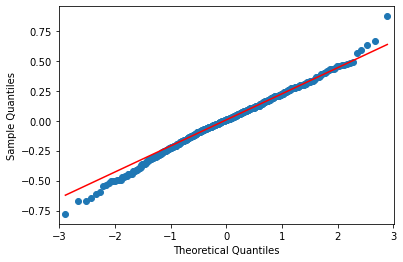

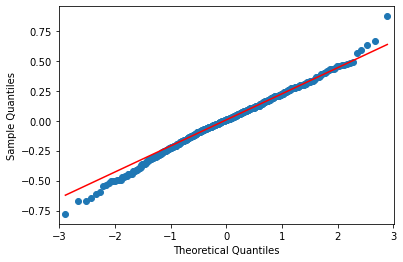

In [38]:
sm.qqplot(results_3.resid, line='q')

Como podemos ver, las líneas azules que representan a los residuos caen cerca de la línea recta. Podemos observar en el gráfico de igual manera que existen observaciones que caen muy por fuera de la línea, por lo que un anális con la prueba de Jarque-Bera para validar la hipótesis de normalidad en residuos podría ser útil.

Para aplicar una prueba estadística como la de Jarque Bera, es conveniente importar un submódulo de statsmodels que son las estadisticas "stats"

In [39]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

Recordemos que el test Jarque-Bera es una prueba de bondad de ajuste que determina si los datos de la muestra tienen asimetría y curtosis que coinciden con una distribución normal.

Como norma general, el estadístico de prueba de la prueba de Jarque-Bera es siempre un número positivo y cuanto más alejado de cero esté, habrá más evidencia de que los datos de la muestra no siguen una distribución normal.

La hipótesis nula de este test es:

- H0: Los datos se distribuyen normalmente
- H1: Los datos no se distribuyen normalmente

In [40]:
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results_3.resid)
lzip(nombres, jarque_bera)

[('Jarque-Bera', 6.251332268522801),
 ('Chi^2 two-tail prob.', 0.04390767547259021),
 ('Skew', -0.15619399962099784),
 ('Kurtosis', 3.4388746752421917)]

Dado que este valor de probabilidad es menor que .05, podemos rechazar la hipótesis nula al 95% de confianza, por lo que tenemos suficiente evidencia para decir que estos datos tienen asimetría y curtosis que es significativamente diferente de una distribución normal. Sin embargo al 90% de confianza, no se logra rechazar la hipótesis nula, por lo que podríamos relajar un poco este supuesto.

Finalmemte, podemos contrastar si la media de los residuos de este modelo es 0, o muy cercano a este. Para esto podemos extraer los residuos del modelo y calcular la media directamente:

In [41]:
results_3.resid.mean()

2.122007706022427e-14

La media de los residuos tiende a cero y es muy pequeña por lo que no se estaría violando este supuesto.

### 4. Homocedasticidad en los residuos

Para comprobar este supuesto podemos graficar los valores ajustados frente a una gráfica de residuos. De existir heterocedasticidad, los residuos se dispersarán mucho más a medida que los valores ajustados aumenten creando una imagen de cono.

Aplicando a Python este gráfico se obtendría por medio del comando residplot dentro de seaborn.

In [42]:
y_pred=results_3.predict()

Text(0.5, 1.0, 'Gráfica de residuos')

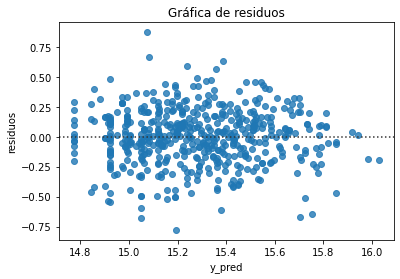

In [43]:
sns.residplot(y_pred, results_3.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")

De la gráfica de residuos anterior, podríamos inferir que los residuos no formaron ningún patrón. Por lo tanto, los residuos son independientes entre sí.

Y además, los residuos tienen varianza constante. La varianza no parece aumentar/disminuir constantemente con el valor y_pred.

Para aplicar una prueba estadística como la de Breush Pagan, es conveniente importar un submódulo de statsmodels que son las estadisticas "stats"

Recordemos que este test se utiliza para determinar la heterocedasticidad en un modelo de regresión lineal, ya que analiza si la varianza estimada de los residuos de una regresión dependen de los valores de las variables independientes.


La hipótesis nula de este test es:

- H0: Existe homocedasticidad
- H1: La homocedasticidad no está presente , por lo que existe heterocedasticidad

In [44]:
nombres = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
breuschpagan = sms.het_breuschpagan(results_3.resid, results.model.exog)
lzip(nombres, breuschpagan)

[('Lagrange multiplier statistic', 21.9176186868182),
 ('p-value', 0.0384535507384683),
 ('f-value', 1.8593672883383126),
 ('f p-value', 0.0369860272077784)]

En este ejemplo, como el estadístico del multiplicador de Lagrange para la prueba es de 21 y el valor p correspondiente es 0.03, el cual es menor a 0.05, podemos rechazar la hipótesis nula, y concluímos que no tenemos evidencia suficiente para decir que la heterocedasticidad no está presente en el modelo de regresión.
Sin embargo este supuesto también pasaría al 90% de confianza.

En este escenario, tenemos algunas opciones, podriamos trabajar en feature engineering que es la creación de nuevas variables a partir de las que tenemos para mejorar nuestra calidad del modelo, o interpretar los resultados al 90% de confianza.
Para este ejercicio, lo vamos a interpretar con un nivel de significancia menor para retomar este ejercicio cuando utilicemos Machine Learning.

Así, podemos decir que del tercer modelo obtenido, hemos alcanzado a capturar el 54% de la variabilidad del logaritmo del precio mediante las variables independientes de número de pisos ,parqueaderos, y las variables dicotómicas que abarcan el concepto de si el inmueble cuenta con: cuarto_huespedes, sotano,  calefaccion, AC, carretera, periferia y cuál es su nivel de amoblado.

Para ejemplificar cómo sería la interpretación, tomemos como ejemplo una variable numérica y una dicotómica:
- En nuestro modelo Log-Nivel interpretaríamos la variable "pisos" como: Un incremento de 1 piso en el inmueble, se asocia a un cambio en "Y" de (100·β1 )%, ( 12%)
- Por su parte una variable dicotómica como si la vivienda dispone de AC se interpretaría como: el logaritmo del precio de la vivienda se incrementará en (100·βx )%, ( 20%)

### Para finalizar: 

Para concluir este script vamos a predecir valores por medio de su forma funcional:

$$log price = 14.78 + 0.14  \times  carretera + 0.1a \times cuarto_huespedes+ 0.10 \times sotano + 0.16 \times calefaccion + 0.20 \times AC + 0.13  \times  periferia+ 0.12  \times  pisos+ 0.08  \times  parqueadero - 0.06  \times  amoblado $$


Por lo que para predecir el logaritmo del precio del inmueble requeriríamos los valores de las variables independientes incluídas en la forma funcional en el mismo formato que fueron incluídos en el modelo.

Una forma más automática de realizarlo, es utilizando el método .predict() el cual calculará el valor de "Y" cuando se le entregue los valores de la variables independientes. Así:

In [45]:
df3=df2[df2.columns.difference(['area', 'cuartos', 'banios', 'precio', 'log_precio'])]
# df3['intercepto']=1
df3=df3[[ 'pisos', 'carretera', 'cuarto_huespedes', 'sotano', 'calefaccion', 'AC', 'parqueadero', 'periferia', 'amoblado']]
df3

,pisos,carretera,cuarto_huespedes,sotano,calefaccion,AC,parqueadero,periferia,amoblado
15,2,1,0,1,0,0,2,0,1
16,2,1,1,1,0,1,1,1,2
17,4,1,0,0,0,1,2,0,0
18,2,1,1,0,0,1,2,0,0
19,2,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
540,1,1,0,1,0,0,2,0,2
541,1,0,0,0,0,0,0,0,1
542,1,1,0,0,0,0,0,0,2
543,1,0,0,0,0,0,0,0,0


In [46]:
results_3.predict()

array([15.38837647, 15.69845873, 15.81193904, 15.6774587 , 15.54125028,
       15.55290272, 15.51921281, 15.5772116 , 15.70398555, 15.55839112,
       15.91891114, 15.94039264, 15.07262203, 15.48328992, 15.64900395,
       15.67271345, 15.74232624, 15.61086308, 15.35660444, 15.70398555,
       15.81193904, 15.69400777, 15.81193904, 15.79178102, 15.66109943,
       15.63738994, 15.78318419, 15.67271345, 15.53417073, 15.73071223,
       15.45309866, 15.73071223, 16.02686462, 15.23753686, 15.56007076,
       15.51702989, 15.59148664, 15.84977981, 15.74232624, 15.52661909,
       15.33793872, 15.98347858, 15.78016701, 15.84977981, 15.31846357,
       15.28077755, 15.47716431, 15.81886385, 15.58491798, 15.08423605,
       15.35039035, 15.56777714, 15.51025982, 15.64395859, 15.68278234,
       15.54128871, 15.28269543, 15.65641023, 15.65641023, 15.79213718,
       15.64177903, 15.49762101, 15.51530518, 15.57987262, 15.44514905,
       15.52271146, 15.41678278, 15.26160251, 15.65291158, 15.35

In [47]:
y_pred=results_3.predict(df3)
y_pred

15     15.388376
16     15.698459
17     15.811939
18     15.677459
19     15.541250
         ...    
540    15.191990
541    14.843934
542    14.921782
543    14.913547
544    15.048556
Length: 517, dtype: float64

### Comparemos las predicciones a los valores reales de Y

In [48]:
df.log_precio

15     16.023785
16     16.023785
17     16.008281
18     16.000438
19     15.996493
         ...    
540    14.414347
541    14.384879
542    14.375126
543    14.375126
544    14.375126
Name: log_precio, Length: 517, dtype: float64

También podríamos darle al modelo un vector para que prediga un sólo valor:


[ 'pisos', 'carretera', 'cuarto_huespedes', 'sotano', 'calefaccion', 'AC', 'parqueadero', 'periferia', 'amoblado']

In [49]:
results_3.predict({'pisos':3,'carretera':1, 'cuarto_huespedes':1, 'sotano':1, 'calefaccion':1, 'AC':1, 'parqueadero':1,
                  'periferia':1, 'amoblado':0})

0    16.128985
dtype: float64

Ejercicio:
Cuánto variaría el precio si el bien inmueble fuese amoblado, con los mismos datos?